# Set Variables

In [ ]:
# --------
my_keyword_Based = True
# my_keyword_Based = False


# -------- my_conv_kernel_output_channel & output_version
my_conv_kernel_output_channel = 64
# outp_version
# v2: 64 filter
# v3: 8  filter
output_version = 2 if my_conv_kernel_output_channel == 64 else 3


# -------- my_balance_train & file_subversion
# my_balance_train = True
my_balance_train = False
file_subversion = ".2-balanced" if my_balance_train else ".1-imbalance"

In [ ]:
dataset_file_names = {
    #"Camel":      "Camel_DE - v.02",
    "CloudStack": "CloudStack_DE - v.01",
    "Geode":      "Geode_DE - v.01",
    "Hbase":      "Hbase_DE - v.01"
}

# Google Colab

In [ ]:
# Libs
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load data from google drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
!ls "/content/gdrive/My Drive/"

Mounted at /content/gdrive
'Colab Notebooks'


In [ ]:
# project folder path
project_folder = "gdrive/MyDrive/Colab Notebooks/paper/"

# data folder path
data_folder =    "00- My Data/one-phase method/"

# output folder path
output_folder =  "01- Jupyter Notebook/60- one-phase method _ CNN _ cost-sensitive/00. Output/"

# Libs

In [ ]:
import json
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from operator import truediv

from matplotlib.ticker import MaxNLocator

In [ ]:
!python -V
import matplotlib
print(matplotlib.__version__)

Python 3.7.13
3.5.2


# Config

In [ ]:
preprocessing_params = {
    "data":{
        "dataset": {
            "columns_name":   ["text", "bug_class_2"],
            "columns_dtype" : {0: "str", 1: "int64"},
            "bug_classes": [0, 1],
            "num_bug_classes": 2
        }
    },
    "keyword_Based": my_keyword_Based,
}

In [ ]:
mypaths = {}

for software_name, ds_file_name in dataset_file_names.items():
    # dataset folder path
    dataset_folder = software_name + "/"

    # output data-folder path
    output_data_folder = project_folder + output_folder + dataset_folder + ds_file_name + "/"

    if my_keyword_Based:
        mypaths[software_name] = output_data_folder + "performances/KB-performance-v{}{}.json".format(output_version, file_subversion)
    else:
        mypaths[software_name] = output_data_folder + "performances/N_KB-performance-v{}{}.json".format(output_version, file_subversion)

In [ ]:
mypaths

{'CloudStack': 'gdrive/MyDrive/Colab Notebooks/paper/01- Jupyter Notebook/one-phased method/00. Output/CloudStack/CloudStack_DE - v.01/performances/KB-performance-v2.1-imbalance.json',
 'Geode': 'gdrive/MyDrive/Colab Notebooks/paper/01- Jupyter Notebook/one-phased method/00. Output/Geode/Geode_DE - v.01/performances/KB-performance-v2.1-imbalance.json',
 'Hbase': 'gdrive/MyDrive/Colab Notebooks/paper/01- Jupyter Notebook/one-phased method/00. Output/Hbase/Hbase_DE - v.01/performances/KB-performance-v2.1-imbalance.json'}

In [ ]:
preprocessing_params = {
    "keyword_Based": my_keyword_Based
}

In [ ]:
bcd_colours = ["blue", "green", "red"]

# my_whole_datas

In [ ]:
my_whole_datas = {}
for k, v in mypaths.items():
    with open(v) as filehandle:
        my_whole_datas[k] = json.load(filehandle)

In [ ]:
class_labels = my_whole_datas["CloudStack"]["preprocessing_params"]["bug_classes"]
epochs = my_whole_datas["CloudStack"]["train_params"]["epochs"]

In [ ]:
print(class_labels)
print(epochs)

[0, 1]
20


In [ ]:
best_step_labels = {}
best_step_indexs = {}
datas = {}

for k, mwd in my_whole_datas.items():
    best_step_labels[k] = mwd["model_results"]["validation"]["best_at_step"]
    best_step_indexs[k] = mwd["model_results"]["validation"]["best_at_step"] - 1
    datas[k] = mwd["model_results"]

In [ ]:
print(best_step_labels)
print(best_step_indexs)

{'CloudStack': 2, 'Geode': 1, 'Hbase': 4}
{'CloudStack': 1, 'Geode': 0, 'Hbase': 3}


In [ ]:
ls = "solid"
lw = 1
lw_test = 5
marker = "."
marker_test = "o"
# train_data_status = train_data_status

colours = {
    "Camel":      "red",
    "CloudStack": "blue",
    "Geode":      "green",
    "Hbase":      "orange"
}

# plot_acc_cost_

In [ ]:
for k, mwd in my_whole_datas.items():
    print("-" * 10, k)
    for i, acc in enumerate(datas[k]["validation"]["accuracy"]):
        print(i + 1, round(acc, 1))

---------- CloudStack
1 70.4
2 71.9
3 65.0
4 71.3
5 71.2
6 70.7
7 70.7
8 71.2
9 71.2
10 70.9
11 71.5
12 71.3
13 71.2
14 71.3
15 71.2
16 71.2
17 70.9
18 71.6
19 71.6
20 71.3
---------- Geode
1 77.0
2 76.9
3 76.2
4 77.0
5 76.6
6 76.3
7 76.5
8 76.2
9 76.5
10 76.6
11 76.5
12 76.5
13 76.5
14 75.9
15 76.3
16 76.3
17 75.1
18 76.2
19 75.2
20 76.5
---------- Hbase
1 66.2
2 65.6
3 65.7
4 67.5
5 65.5
6 66.1
7 64.7
8 65.4
9 66.3
10 65.5
11 64.8
12 65.0
13 64.9
14 65.7
15 65.1
16 65.2
17 65.0
18 65.5
19 65.1
20 64.9


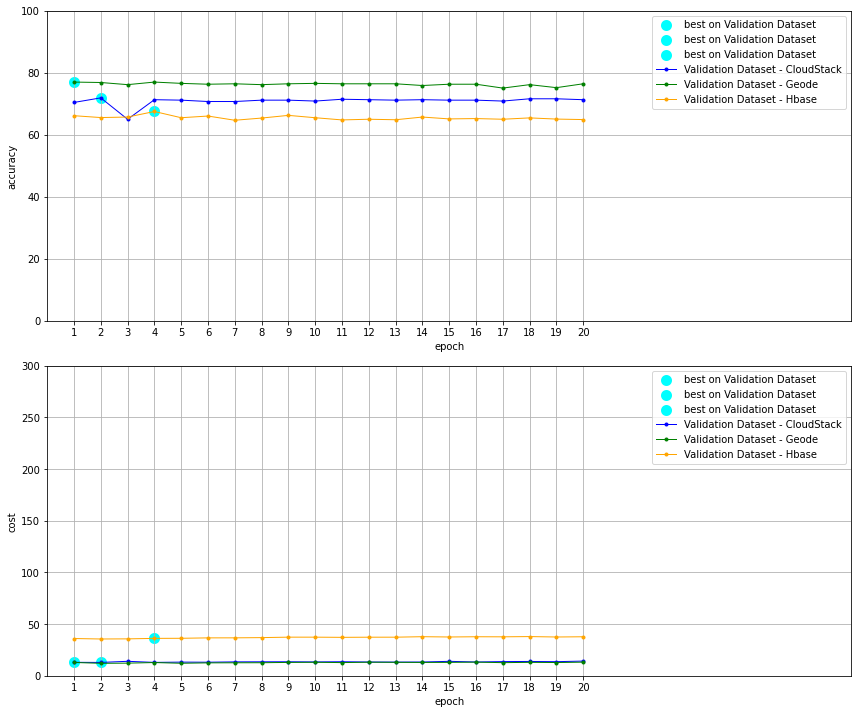

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

mymetrics = ["accuracy", "cost"]
my_x = range(1, epochs + 1, 1)

for ax, metric in zip(axes, mymetrics):
    ax.get_xaxis().set_major_locator(MaxNLocator(integer=True))

    if metric == "accuracy":
        for k, mwd in my_whole_datas.items():
            ax.set_ylim([0, 100])
            ax.scatter(best_step_labels[k], datas[k]["validation"]["best_acc"], 
                       label="best on Validation Dataset", color="cyan", lw=lw_test, marker=marker_test)
    else:
        for k, mwd in my_whole_datas.items():
            ax.set_ylim([0, 300])
            ax.scatter(best_step_labels[k], datas[k]["validation"]["cost"][best_step_indexs[k]], 
                       label="best on Validation Dataset", color="cyan", lw=lw_test, marker=marker_test)

    for k, mwd in my_whole_datas.items():
        ax.plot(my_x, metric, data=datas[k]["validation"], label="Validation Dataset - {}".format(k), 
                color=colours[k], linestyle=ls, lw=lw, marker=marker)

    ax.set_xlim([0, 30])
    ax.set_xlabel("epoch")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

    ax.get_xaxis().set_ticks( list(range(1, epochs + 1)) )
# --- end for

fig.tight_layout(pad=1.0)

# call

In [ ]:
my_path =   "SAVE/Tests/"
file_name = "One-phased Method - v06-dpi=1000.jpg"
full_path = "gdrive/MyDrive/" + my_path + file_name

resolution_value = 1000

fig.savefig(full_path, format="jpg", dpi=resolution_value)